# Data Preparation and Visualization

[Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis) (EDA) is an approach to analyzing data sets to summarize and understand their main characteristics, often with visual methods.

Starting with your *Machine Learning Checklist* you will see that a crucial step is **preparing and understanding** the data. It is a step where you will spend most of your time.  Here is an example checklists from [Aurélien Géron](10_20_2018_Machine-Learning-Project-Checklist.txt) that you can adapt to your needs.   

In these series of notebooks, we explore the Home Credit data set. We clean, preprocess and visualize the data for downstream processes in the Data Science Workflow. 

All notebooks can be obtained from Github : https://github.com/chalendony/data-prep-visualization
 
## Part 1: Data Exploration
* Overview Data Set
* Load Data from Quilt Data Repository
* Validate the Data types  
* Missing Data Strategy
    + Categorical Data
    + Numerical Data
* Feature Selection 


## Part 2: Piplelines:  Feature Union



## Part 3 : Reshaping Data
* Merge & Join
* Group-by 

## Part 4: Interactive Visualizaton

* Plotly / Dash
* Bokeh
* Pygal: 



## Bonus Material
* <a href="Quilt Setup HomeCredit Data.ipynb">Quilt Data Repository</a> 
* Imputating Categorical Variables : https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779

https://github.com/awslabs/datawig/blob/master/README.md


Useful Links:

* Workshop Code: xxx 
* Plotly / Dash: https://dash.plot.ly/getting-started
* Pygal:http://www.pygal.org/en/stable/index.html
* Bokeh: 
* The EOS Color Pallette


In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer
#pd.set_option('display.max_columns', 125)
pd.reset_option('display.max_columns')
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.reset_option.html?highlight=set_option#pandas-reset-option
import quilt
from scripts.preprocess import percent_missing

# # More elegant: df = pd.concat([pd.read_csv(f) for f in glob.glob('data*.csv')], ignore_index = True)


# Overview Data Set 
The [data](https://www.kaggle.com/c/home-credit-default-risk/data) is provided by Home Credit,  a service dedicated to provided lines of credit (i.e.: loans). 

![Home Credtit Default Risk data](images/home_credit.png "Home Credit Default Risk")

In [63]:
quilt.ls()

/Users/stewarta/Library/Application Support/QuiltCli/quilt_packages
avare/homecredit               latest               3e659fce4c878d0ad00f6df85ca1aef2aa1bcef25137f030312f01f39d256a82


In [64]:
# Remove a package from local storage (but not from the registry)
quilt.rm("avare/homecredit")

Remove avare/homecredit? (y/n) n


# Load Data from Quilt Data Repository

Want to know more about Quilt, then take a look at: <a href="Quilt Setup HomeCredit Data.ipynb">Example: Store and Access Data from Quilt Repository</a>

## Optionally, Reset local repository

In [6]:
#quilt.ls()

/Users/stewarta/Library/Application Support/QuiltCli/quilt_packages


In [5]:
#quilt.rm("avare/homecredit") # local

Remove avare/homecredit? (y/n) y
Removed: 7c37cfd9209cba651804e30c1075f58c61378cace8328a1af3d29b12a44dc8a9
Removed: ab6b04fb562f2fc5b4f4ac7cbb6d7f9595593012c6054d3e829bb58d4eac309f
Removed: 96bd8bd61b5e0c092a0250446fef02bed339292a849cf4d657960f8360cffc20
Removed: 6d3d0e19395f145c9e3c67e6a6dd93af825d7373cbd6cbb78b1e48751fa709f7
Removed: 387757fda555fa074f213247ea5dad44fbc21c7f36d012a8267f5b3dc7f4770b
Removed: 2f6e16cadbf4569a6ce78c6efc80b50547a7f85473bbb2a14c6ec27a1cbb9fc5
Removed: 40cbc65c2981e527b69cbc5fb4f257611af325edac5bd7c02398d698fe6705d2


## Optionally, Install Quilt public packages to local repository

In [7]:
#quilt.install("avare/homecredit", hash="1266d85da94de98efe04a61beb6b028db90ad703155b28b550fbfb79e9b8fb7e")


  0%|          | 0.00/707M [00:00<?, ?B/s]

100%|██████████| 707M/707M [02:58<00:00, 3.96MB/s] 


## Import the package into Python


In [2]:
from quilt.data.avare import homecredit

## Glimpse Quilt Repository Packages

In [3]:
homecredit

<GroupNode>
POS_CASH_balance
application_train
bureau
bureau_balance
credit_card_balance
installments_payments
previous_application

Enumerate package contents
* quilt.inspect("USER/PACKAGE") shows package columns, types, and shape
* NODE._keys() returns a list of all children
* NODE._data_keys() returns a list of all data children (leaf nodes containing actual data)
* NODE._group_keys() returns a list of all group children (groups are like folders)
* NODE._items() returns a generator of the node's children as (name, node) pairs.
* NODE is iterable: for child in NODE:... 

In [4]:
homecredit._data_keys()

['POS_CASH_balance',
 'application_train',
 'bureau',
 'bureau_balance',
 'credit_card_balance',
 'installments_payments',
 'previous_application']

## Glimpse Data: Application Dataframe

In [5]:
df = homecredit.application_train()

Dataframe.info() function prints information that can answer the following questions about a DataFrame:

* How many rows and columns do we have?
* Did csv.read() infer the types correctly?
* How many of each dtypes is used?
* Which rows / columns can be excluded from further analysis?
* How much memory does the data require?

In [8]:
df.info(null_counts=True,verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_

# Validate Data Types

Pandas has inferred our the data types. However sometimes the types are not as we would like.
Referring to the data description, we manually verify the data types for the categorical and numeric variables.

In [23]:
categorical_features = ['TARGET','SK_ID_CURR','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','FONDKAPREMONT_MODE','HOUSETYPE_MODE', 'NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE', \
                        'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_EMP_PHONE',\
                        'FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE',\
                        'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',\
                        'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',\
                        'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',\
                        'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',\
                        'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15',\
                        'FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

___<font color=red> Exercise 1. Above is a list of the categorical variables in the application data from. All remaining variables are numerical. Create a  list to holds all numeric variables. 
</font>___

1. Store the results in a variable named: __"numerical_features"__, this variable will be used later.
2. HINT: Try using df.columns.difference() 
3. Convert the final result to a list.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.difference.html?highlight=difference#pandas.Index.difference 

In [7]:
numerical_features=df.columns.difference(categorical_features).values.tolist()

In [18]:
## Exercise 1: Practice Cell

___<font color=red> Exercise 2. Use the Python String format() to print the number of numeric features: 
</font>___

Docs: https://docs.python.org/3/tutorial/inputoutput.html#the-string-format-method  
        

In [36]:
print("I have {} numeric features".format(len(numerical_features)))

I have 69 numeric features


In [ ]:
## Exercise 2: Practice Cell

___<font color=red> Exercise 2. Use the String format() Method https://docs.python.org/3/tutorial/inputoutput.html#the-string-format-methodformat to print the number of   variables in your numerical dataframe?
</font>___



In [ ]:
print('I have {} numeric variables)'.format(len(numerical_features)))

In [ ]:
## Exercise 1: Practice Cell 

# Missing Data Strategy : Categorical

Options for handling missing data include:

+ Option 1: Delete instances (rows) that have missing data:  eg: DF.dropna(subset=["column_name"]

+ Option 2: Drop columns with a high percentage of missing values: DF.drop("total_bedrooms", axis=1)

+ Option 3: Impute: fill in these missing values

+ Option 4: Algorithms such as, XGBoost that can handle missing values with no need for imputation. 

Which option we choose depends on a number of factors: such as, importance of the column or amount of missing data. Lets decide on a strategy by first, examine the missing columns per datatype: categorical and numeric.

## Glimpse Categorical

Have a look at the categorical columns to ensure they are correct.

In [8]:
df[categorical_features]
## TODO remove target and identifier

,TARGET,SK_ID_CURR,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,1,100002,"Stone, brick",No,reg oper account,block of flats,Cash loans,M,N,Y,...,0,0,0,0,0,0,0,0,0,0
1,0,100003,Block,No,reg oper account,block of flats,Cash loans,F,N,N,...,0,0,0,0,0,0,0,0,0,0
2,0,100004,None,None,None,None,Revolving loans,M,Y,Y,...,0,0,0,0,0,0,0,0,0,0
3,0,100006,None,None,None,None,Cash loans,F,N,Y,...,0,0,0,0,0,0,0,0,0,0
4,0,100007,None,None,None,None,Cash loans,M,N,Y,...,0,0,0,0,0,0,0,0,0,0
5,0,100008,None,None,None,None,Cash loans,M,N,Y,...,0,0,0,0,0,0,0,0,0,0
6,0,100009,None,None,None,None,Cash loans,F,Y,Y,...,0,0,1,0,0,0,0,0,0,0
7,0,100010,None,None,None,None,Cash loans,M,Y,Y,...,0,0,0,0,0,0,0,0,0,0
8,0,100011,None,None,None,None,Cash loans,F,N,Y,...,0,0,0,0,0,0,0,0,0,0
9,0,100012,None,None,None,None,Revolving loans,M,N,Y,...,0,0,0,0,0,0,0,0,0,0


## Percent Missing Categorical Values

Compute the missing percent of missing values in the dataframe for the categorical columns

In [9]:
percent_missing(df, categorical_features).query("Perc_Missing > 0")

### NOOOO COMMONAREA_MEDI is not categorical!!!!!!!

,Total,Perc_Missing
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


In [10]:
df.COMMONAREA_MEDI

0         0.0144
1         0.0608
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN
13        0.0585
14        0.1150
15           NaN
16           NaN
17           NaN
18        0.0018
19           NaN
20           NaN
21           NaN
22        0.0120
23        0.1071
24        0.0214
25        0.0010
26           NaN
27           NaN
28           NaN
29        0.0189
           ...  
307481       NaN
307482    0.0038
307483    0.0000
307484       NaN
307485       NaN
307486       NaN
307487       NaN
307488       NaN
307489    0.0009
307490       NaN
307491       NaN
307492       NaN
307493       NaN
307494       NaN
307495    0.0137
307496       NaN
307497       NaN
307498       NaN
307499       NaN
307500       NaN
307501       NaN
307502       NaN
307503       NaN
307504       NaN
307505    0.1441
307506    0.0203
307507    0.0022
307508    0.01

In [26]:
# which column is COMMONAREA_MEDI
df[categorical_features].columns.get_loc("COMMONAREA_MEDI")


KeyError: 'COMMONAREA_MEDI'

## Strategy for Missing Categoricals

Let's assume that a missing categorical value have a special meaning. So, we impute the missing categorical values with a dedicated symbol.

Pick a symbol and ensure that the dedicated symbol for the categorical is not already present in the data set

In [13]:
cat_fillin = '999'
df.isin([cat_fillin]).any().sum()

0

___<font color=red> Exercise 3. Use the Python Simple Imputer() to fill in the missing categorical values with the constant
</font>___

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html


In [14]:
cat_imputer = SimpleImputer(strategy="constant", fill_value=cat_fillin, verbose= True)
cat_imputer.fit(df[categorical_features])
imputed_cat = cat_imputer.transform(df[categorical_features])

In [58]:
## Exercise 3: Practice Cell

In [15]:
imputed_cat.shape[0]

307511

In [16]:
imputed_cat.shape[1]

53

In [18]:
imputed_cat[3:13,76]

IndexError: index 76 is out of bounds for axis 1 with size 53

In [ ]:
(df[categorical_features])
imputed = cat_imputer.transform(df[categorical_features])

## Verify Imputed Categoricals

In [22]:
percent_missing(x, categorical_features)

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [74]:
cat_imputer = SimpleImputer(strategy="constant", fill_value=cat_fillin, verbose= True)
cat_imputer.fit(df[categorical_features])

SimpleImputer(copy=True, fill_value='999', missing_values=nan,
       strategy='constant', verbose=True)

## BONUS: KNN to impute Categorical Variables

# Missing Data Strategy : Numericals

## Summary of Numeric Values

Now, let's look at the missing values for the numeric values.

In [ ]:
cat_imputer = SimpleImputer(strategy="constant", fill_value=cat_fillin, verbose= True)
cat_imputer.fit(df[categorical_features])

In [49]:
df[numerical_features].head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,OBS_60_CNT_SOCIAL_CIRCLE,OWN_CAR_AGE,REGION_POPULATION_RELATIVE,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,NaN,0.018801,0.0149,0.9722,0.9722,0.9722,0.6192,0.6243,0.6341
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,NaN,0.003541,0.0714,0.9851,0.9851,0.9851,0.7960,0.7987,0.8040
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,26.0,0.010032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,0.008019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.028663,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Summary of Missing Numerival Values

Compute the missing percent of missing values in the dataframe for the numeric columns

In [51]:
missing_application_train_data.loc[numerical_features].sort_values(by='%Missing', ascending=False)

NameError: name 'missing_application_train_data' is not defined

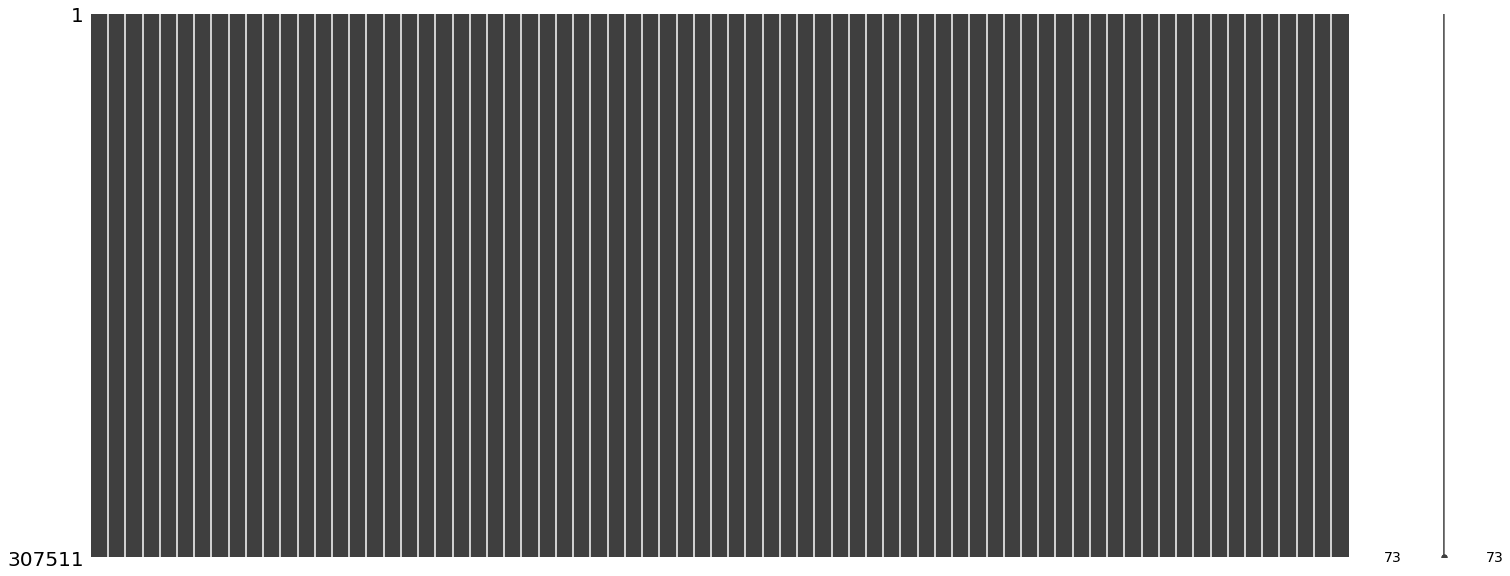

In [53]:
imputer = Imputer(strategy="median", verbose= True)
imputer.fit(df[num_vars]) 
X = imputer.transform(df[num_vars].copy())
temp = pd.DataFrame(X, columns=num_vars) 
msno.matrix(temp) 

## Filling Missing Categorical Columns with Special Value

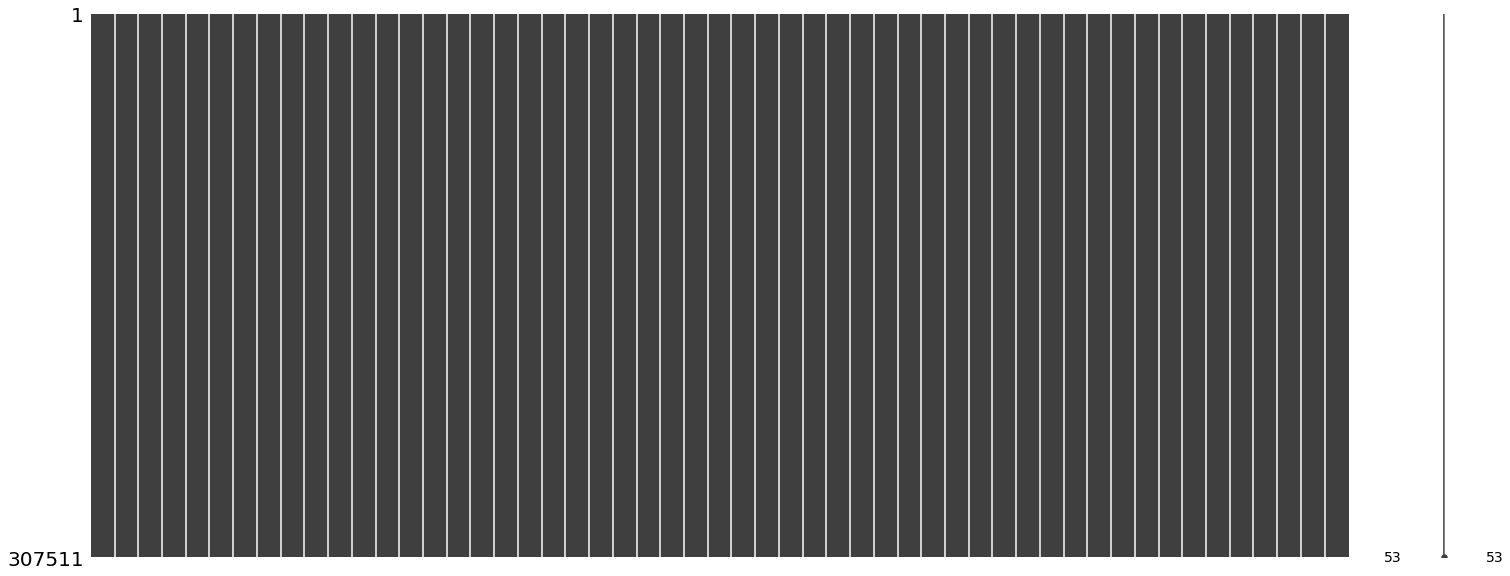

In [55]:
# Replace missing data with a special value. Missing information captured in the model
temp = df[cat_vars].fillna(999,inplace=False)
msno.matrix(temp)

## Encoding Dummy Variables - Option 1

In [80]:
pd.get_dummies(df[cat_vars], dummy_na=True)
# question how do revert back to the original value?

,TARGET,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,...,NAME_CONTRACT_TYPE_nan,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_CAR_nan,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,FLAG_OWN_REALTY_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan
0,1,1,1,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,0,1,1,0,1,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,0,1,1,1,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
5,0,1,1,1,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
6,0,1,1,0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
7,0,1,1,1,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
8,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
9,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


## Encoding Dummy Variables - Option 2 

In [77]:
encoder = LabelBinarizer()
temp_cat_1hot = encoder.fit_transform(df['FLAG_DOCUMENT_4']) 
temp_cat_1hot
# ... repeat for all columns

['TARGET',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'NAME_CONTRACT_TYPE_Cash loans',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'NAME_CONTRACT_TYPE_nan',
 'CODE_GENDER_F',
 'CODE_GENDER_M',
 'CODE_GENDER_XNA',
 'CODE_GENDER_nan',
 'FLAG_OWN_CAR_N',
 'FLAG_OWN_CAR_Y',
 'FLAG_OWN_CAR_nan',
 'FLAG_OWN_REALTY_N',
 'FLAG_OWN_REALTY_Y',
 'FLAG_OWN_REALTY

In [ ]:
# Example: Create categorical variables
# https://stackoverflow.com/questions/32011359/convert-categorical-data-in-pandas-dataframe

cat_columns = df.select_dtypes(['category']).columns
cat_columns
Index([u'col2', u'col3'], dtype='object')
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

# Now as Categorical.from_array is deprecated, use Categorical directly
dataframe.col3 = pd.Categorical(dataframe.col3).codes
dataframe.col3, mapping_index = pd.Series(dataframe.col3).factorize()

# Feature Selection

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = pd.concat((pd.DataFrame(df.TARGET),pd.get_dummies(df[cat_vars], dummy_na=True)), axis=1)
print(X.shape)
X = X.dropna(axis=0, how='any')
print(X.shape)
y = X.TARGET
y.shape
X_new = SelectKBest(chi2, k=100).fit_transform(X, y)
X_new
X_new.shape

(307511, 202)
(307511, 202)


(307511, 100)